In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Utility Functions (DO NOT CHANGE)

def sample(center: tuple = (0, 0), r1: float = 0, r2: float = 1, num_points: int = 100, pos=0):
    '''
    pos : sets the mode for generation
    -1 -> points sampled above x-axis only
    0  -> points sampled above and below x-axis
    1  -> points sampled below x-axis only
    '''
    x0, y0 = center
    r = np.sqrt(np.random.uniform(r1**2, r2**2, size=num_points))
    #
    if pos==-1 : theta = np.random.uniform(0, np.pi, size=num_points)
    elif pos==0 : theta = np.random.uniform(0, 2*np.pi, size=num_points)
    elif pos==1 : theta = np.random.uniform(np.pi, 2*np.pi, size=num_points)
    else : raise ValueError('pos value not supported')

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x0 + x, y0 + y

def circles_dataset(n_samples=1000) :
    points1 = sample(center=(0,0), r1=0, r2=1.15, num_points=n_samples//3)
    labels1 = [0 for _ in points1[0]]
    points2 = sample(center=(0,0), r1=1, r2=1.6, num_points=n_samples//3, pos=1)
    labels2 = [1 for _ in points2[0]]
    points3 = sample(center=(0,0), r1=1, r2=1.6, num_points=n_samples//3, pos=-1)
    labels3 = [2 for _ in points3[0]]

    total_x = np.array(list(points1[0]) + list(points2[0]) + list(points3[0])).reshape(-1,1)
    total_y = np.array(list(points1[1]) + list(points2[1]) + list(points3[1])).reshape(-1,1)

    X = np.stack([total_x, total_y], axis=1).squeeze()
    Y = np.array(labels1 + labels2 + labels3)
    return X, Y

def moons_dataset(n_samples=1000) :
    return make_moons(n_samples=n_samples, noise=5e-2)

def visualize(X, Y, size=5) :
    colormap = {0:'red', 1:'blue', 2:'green'}
    colors = [colormap[y] for y in Y]
    plt.figure(figsize=(size,size))
    plt.scatter(*X.T, c=colors)
    plt.show()

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, poly=None, **params):
    inp = np.c_[xx.ravel(), yy.ravel()]
    if poly!=None : inp = poly.transform(inp)
    Z = clf.predict(inp)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_boundary(model, plot_title, size=8, poly=None):
    '''
    poly : If using PolynomialFeatures() from sklearn, add the function after fit_transforming on the data
    '''
    fig, ax = plt.subplots(figsize=(size,size))
    title = (plot_title)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, model, xx, yy, poly=poly, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

Circles_dataset

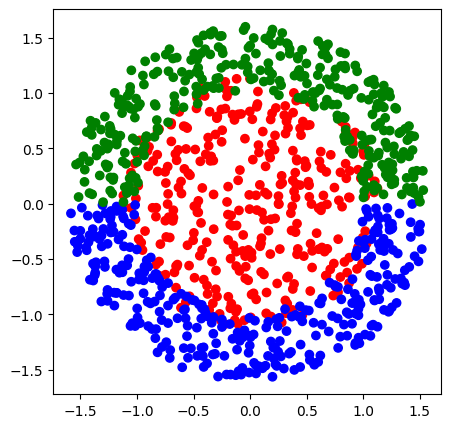

In [3]:
X, Y = circles_dataset(1000)
visualize(X, Y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


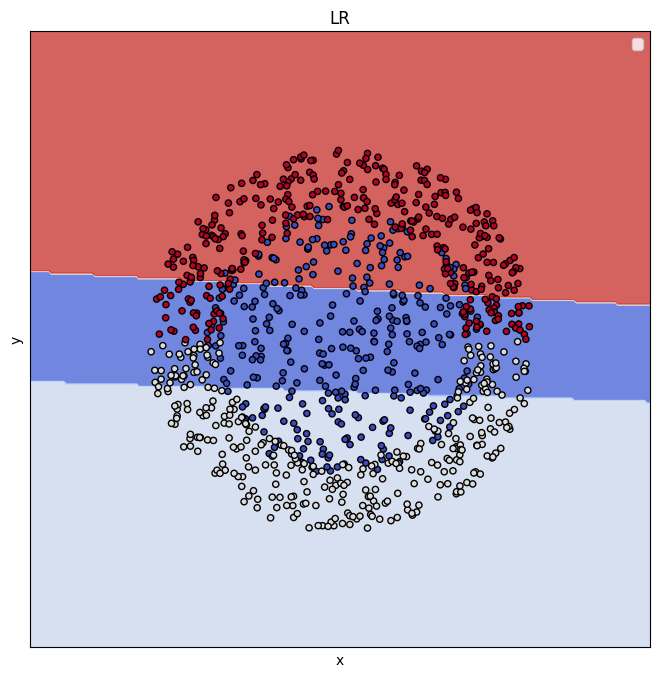

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, Y)
plot_decision_boundary(model, 'LR')

Moons Dataset

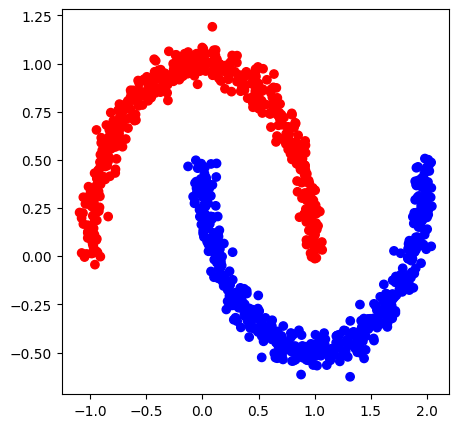

In [5]:
X, Y = moons_dataset(1000)
visualize(X, Y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


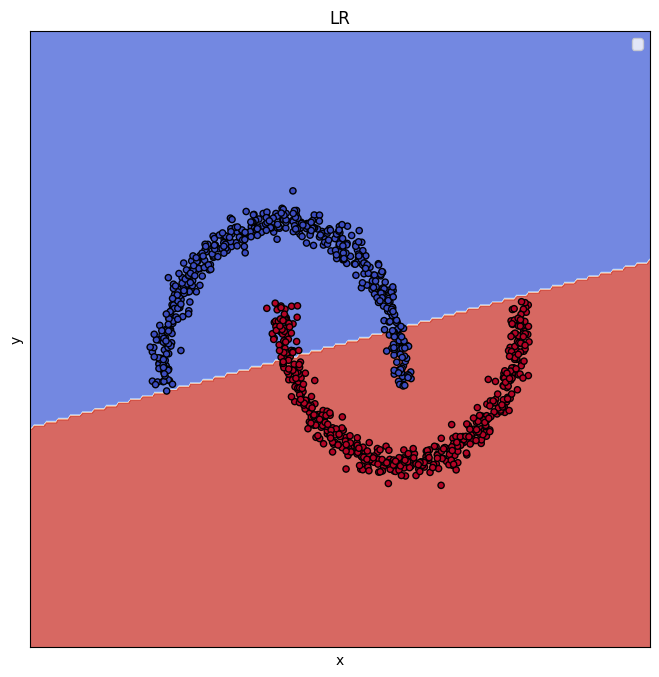

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, Y)
plot_decision_boundary(model, 'LR')

In [7]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X,Y)

SVC(kernel='linear')

In [8]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X,Y)

SVC()

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,Y)

RandomForestClassifier()

In [10]:
from sklearn.neural_network import MLPClassifier

# One hidden layer with 5 neurons
nn_single = MLPClassifier(hidden_layer_sizes=(5,))
nn_single.fit(X,Y)

# Two hidden layers with 5 neurons each
nn_double = MLPClassifier(hidden_layer_sizes=(5,5))
nn_double.fit(X,Y)


C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


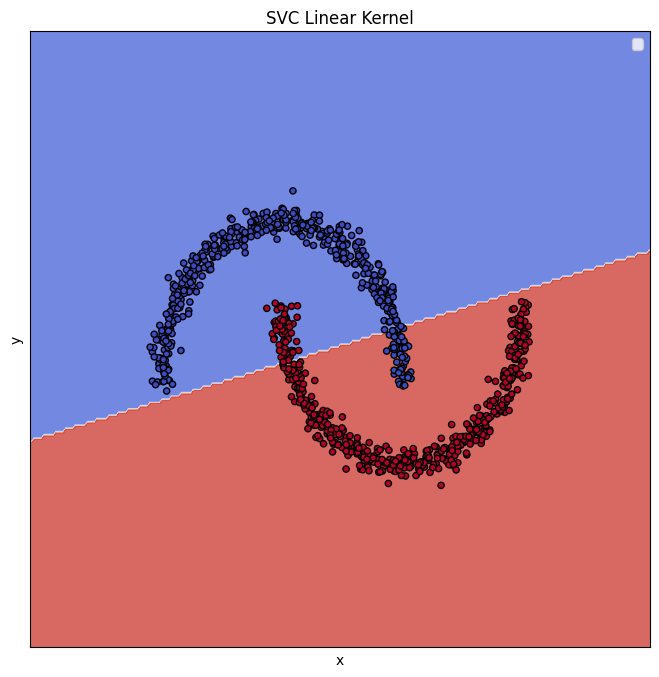

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


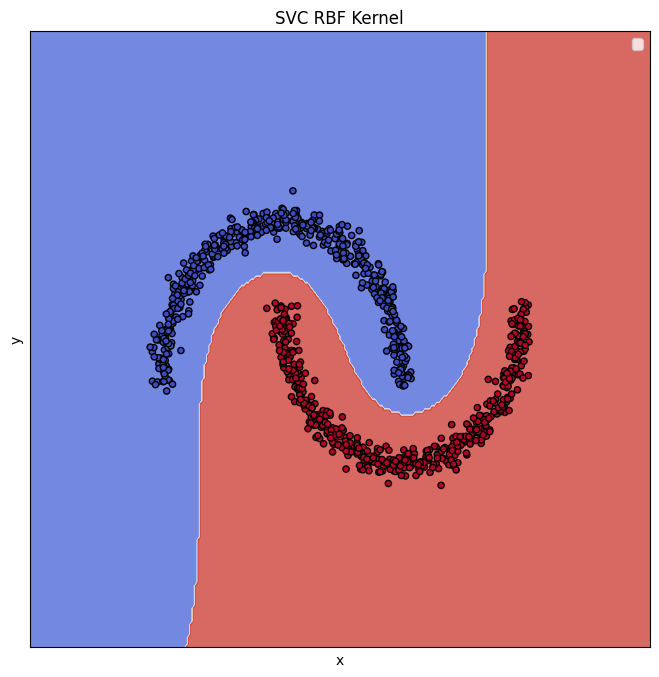

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


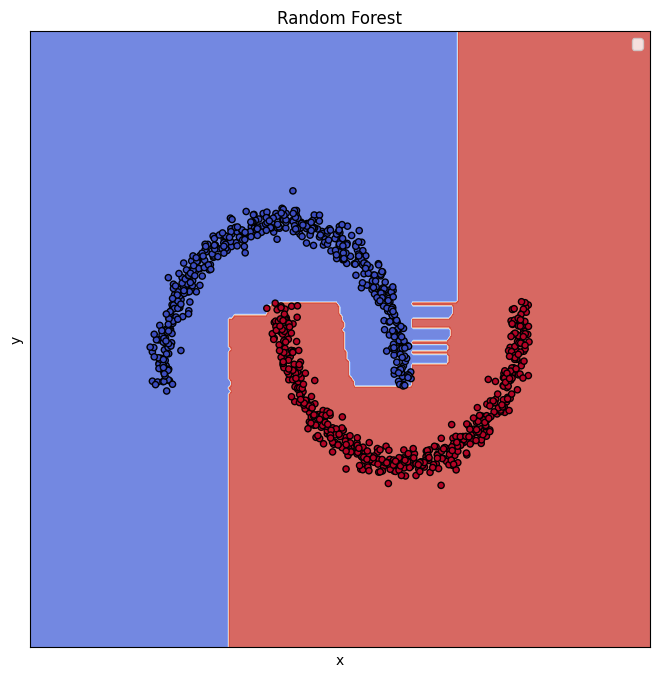

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


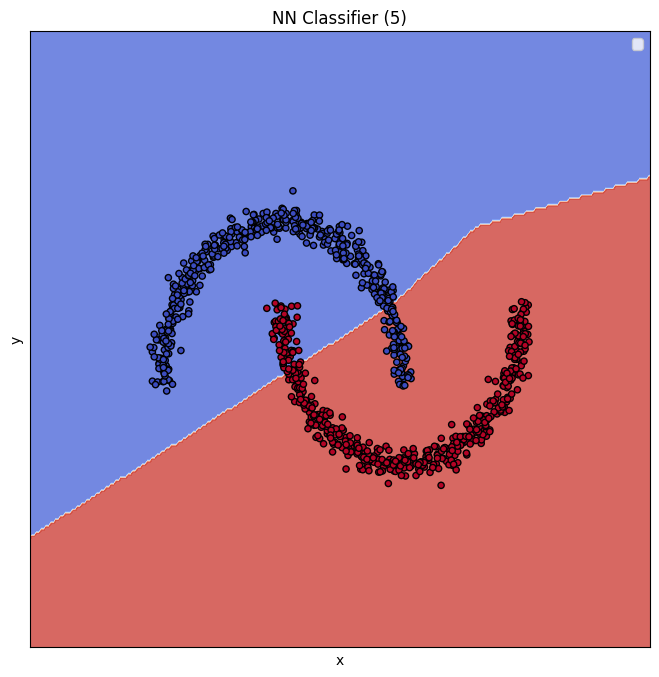

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


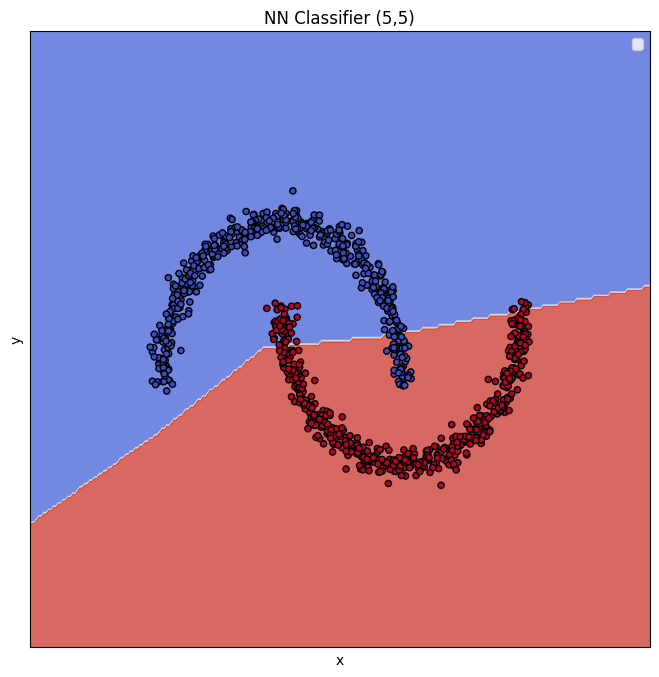

In [11]:
plot_decision_boundary(svc_linear,'SVC Linear Kernel')
plot_decision_boundary(svc_rbf,'SVC RBF Kernel')
plot_decision_boundary(rf_classifier, 'Random Forest')
plot_decision_boundary(nn_single,'NN Classifier (5)')
plot_decision_boundary(nn_double,'NN Classifier (5,5)')

In [12]:
from sklearn.metrics import confusion_matrix

# Assuming X_test and y_test are defined
y_pred_linear = svc_linear.predict(X)
cm_linear = confusion_matrix(Y, y_pred_linear)

y_pred_rbf = svc_rbf.predict(X)
cm_rbf = confusion_matrix(Y, y_pred_rbf)

y_pred_rf = rf_classifier.predict(X)
cm_rf = confusion_matrix(Y, y_pred_rf)

y_pred_nn_single = nn_single.predict(X)
cm_nn_single = confusion_matrix(Y, y_pred_nn_single)

y_pred_nn_double = nn_double.predict(X)
cm_nn_double = confusion_matrix(Y, y_pred_nn_double)

y_pred_lr = model.predict(X)
cm_lr = confusion_matrix(Y, y_pred_lr)

# Print confusion matrices
print("Confusion Matrix for SVC Linear Kernel:\n", cm_linear)
print("Confusion Matrix for SVC RBF Kernel:\n", cm_rbf)
print("Confusion Matrix for Random Forest:\n", cm_rf)
print("Confusion Matrix for NN Classifier (5):\n", cm_nn_single)
print("Confusion Matrix for NN Classifier (5,5):\n", cm_nn_double)
print("Confusion Matrix for Logistic Regression:\n", cm_lr)


Confusion Matrix for SVC Linear Kernel:
 [[442  58]
 [ 58 442]]
Confusion Matrix for SVC RBF Kernel:
 [[500   0]
 [  0 500]]
Confusion Matrix for Random Forest:
 [[500   0]
 [  0 500]]
Confusion Matrix for NN Classifier (5):
 [[421  79]
 [ 66 434]]
Confusion Matrix for NN Classifier (5,5):
 [[449  51]
 [ 50 450]]
Confusion Matrix for Logistic Regression:
 [[441  59]
 [ 56 444]]


In [13]:
# Logistic Regression
TP, FP, FN, TN = cm_lr[1,1], cm_lr[0,1], cm_lr[1,0], cm_lr[0,0]
accuracy_lr = (TP + TN) / np.sum(cm_lr)
precision_lr = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_lr = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score_lr = 2 * precision_lr * recall_lr / (precision_lr + recall_lr) if (precision_lr + recall_lr) != 0 else 0

# SVC Linear Kernel
TP, FP, FN, TN = cm_linear[1,1], cm_linear[0,1], cm_linear[1,0], cm_linear[0,0]
accuracy_linear = (TP + TN) / np.sum(cm_linear)
precision_linear = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_linear = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score_linear = 2 * precision_linear * recall_linear / (precision_linear + recall_linear) if (precision_linear + recall_linear) != 0 else 0

# SVC RBF Kernel
TP, FP, FN, TN = cm_rbf[1,1], cm_rbf[0,1], cm_rbf[1,0], cm_rbf[0,0]
accuracy_rbf = (TP + TN) / np.sum(cm_rbf)
precision_rbf = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_rbf = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score_rbf = 2 * precision_rbf * recall_rbf / (precision_rbf + recall_rbf) if (precision_rbf + recall_rbf) != 0 else 0

# Random Forest
TP, FP, FN, TN = cm_rf[1,1], cm_rf[0,1], cm_rf[1,0], cm_rf[0,0]
accuracy_rf = (TP + TN) / np.sum(cm_rf)
precision_rf = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_rf = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score_rf = 2 * precision_rf * recall_rf / (precision_rf + recall_rf) if (precision_rf + recall_rf) != 0 else 0

# NN Classifier (5)
TP, FP, FN, TN = cm_nn_single[1,1], cm_nn_single[0,1], cm_nn_single[1,0], cm_nn_single[0,0]
accuracy_nn_single = (TP + TN) / np.sum(cm_nn_single)
precision_nn_single = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_nn_single = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score_nn_single = 2 * precision_nn_single * recall_nn_single / (precision_nn_single + recall_nn_single) if (precision_nn_single + recall_nn_single) != 0 else 0

# NN Classifier (5,5)
TP, FP, FN, TN = cm_nn_double[1,1], cm_nn_double[0,1], cm_nn_double[1,0], cm_nn_double[0,0]
accuracy_nn_double = (TP + TN) / np.sum(cm_nn_double)
precision_nn_double = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_nn_double = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score_nn_double = 2 * precision_nn_double * recall_nn_double / (precision_nn_double + recall_nn_double) if (precision_nn_double + recall_nn_double) != 0 else 0

# Print metrics
print("Logistic Regression - \n Accuracy:", accuracy_lr, "\t Precision:", precision_lr, "\t Recall:", recall_lr, "\t F1 Score:", f1_score_lr)
print("SVC Linear Kernel - \n Accuracy:", accuracy_linear, "\t Precision:", precision_linear, "\t Recall:", recall_linear, "\t F1 Score:", f1_score_linear)
print("SVC RBF Kernel - \n Accuracy:", accuracy_rbf, "\t Precision:", precision_rbf, "\t Recall:", recall_rbf, "\t F1 Score:", f1_score_rbf)
print("Random Forest - \n Accuracy:", accuracy_rf, "\t Precision:", precision_rf, "\t Recall:", recall_rf, "\t F1 Score:", f1_score_rf)
print("NN Classifier (5) - \n Accuracy:", accuracy_nn_single, "\t Precision:", precision_nn_single, "\t Recall:", recall_nn_single, "\t F1 Score:", f1_score_nn_single)
print("NN Classifier (5,5) - \n Accuracy:", accuracy_nn_double, "\t Precision:", precision_nn_double, "\t Recall:", recall_nn_double, "\t F1 Score:", f1_score_nn_double)


Logistic Regression - 
 Accuracy: 0.885 	 Precision: 0.882703777335984 	 Recall: 0.888 	 F1 Score: 0.8853439680957128
SVC Linear Kernel - 
 Accuracy: 0.884 	 Precision: 0.884 	 Recall: 0.884 	 F1 Score: 0.884
SVC RBF Kernel - 
 Accuracy: 1.0 	 Precision: 1.0 	 Recall: 1.0 	 F1 Score: 1.0
Random Forest - 
 Accuracy: 1.0 	 Precision: 1.0 	 Recall: 1.0 	 F1 Score: 1.0
NN Classifier (5) - 
 Accuracy: 0.855 	 Precision: 0.8460038986354775 	 Recall: 0.868 	 F1 Score: 0.8568608094768015
NN Classifier (5,5) - 
 Accuracy: 0.899 	 Precision: 0.8982035928143712 	 Recall: 0.9 	 F1 Score: 0.8991008991008991


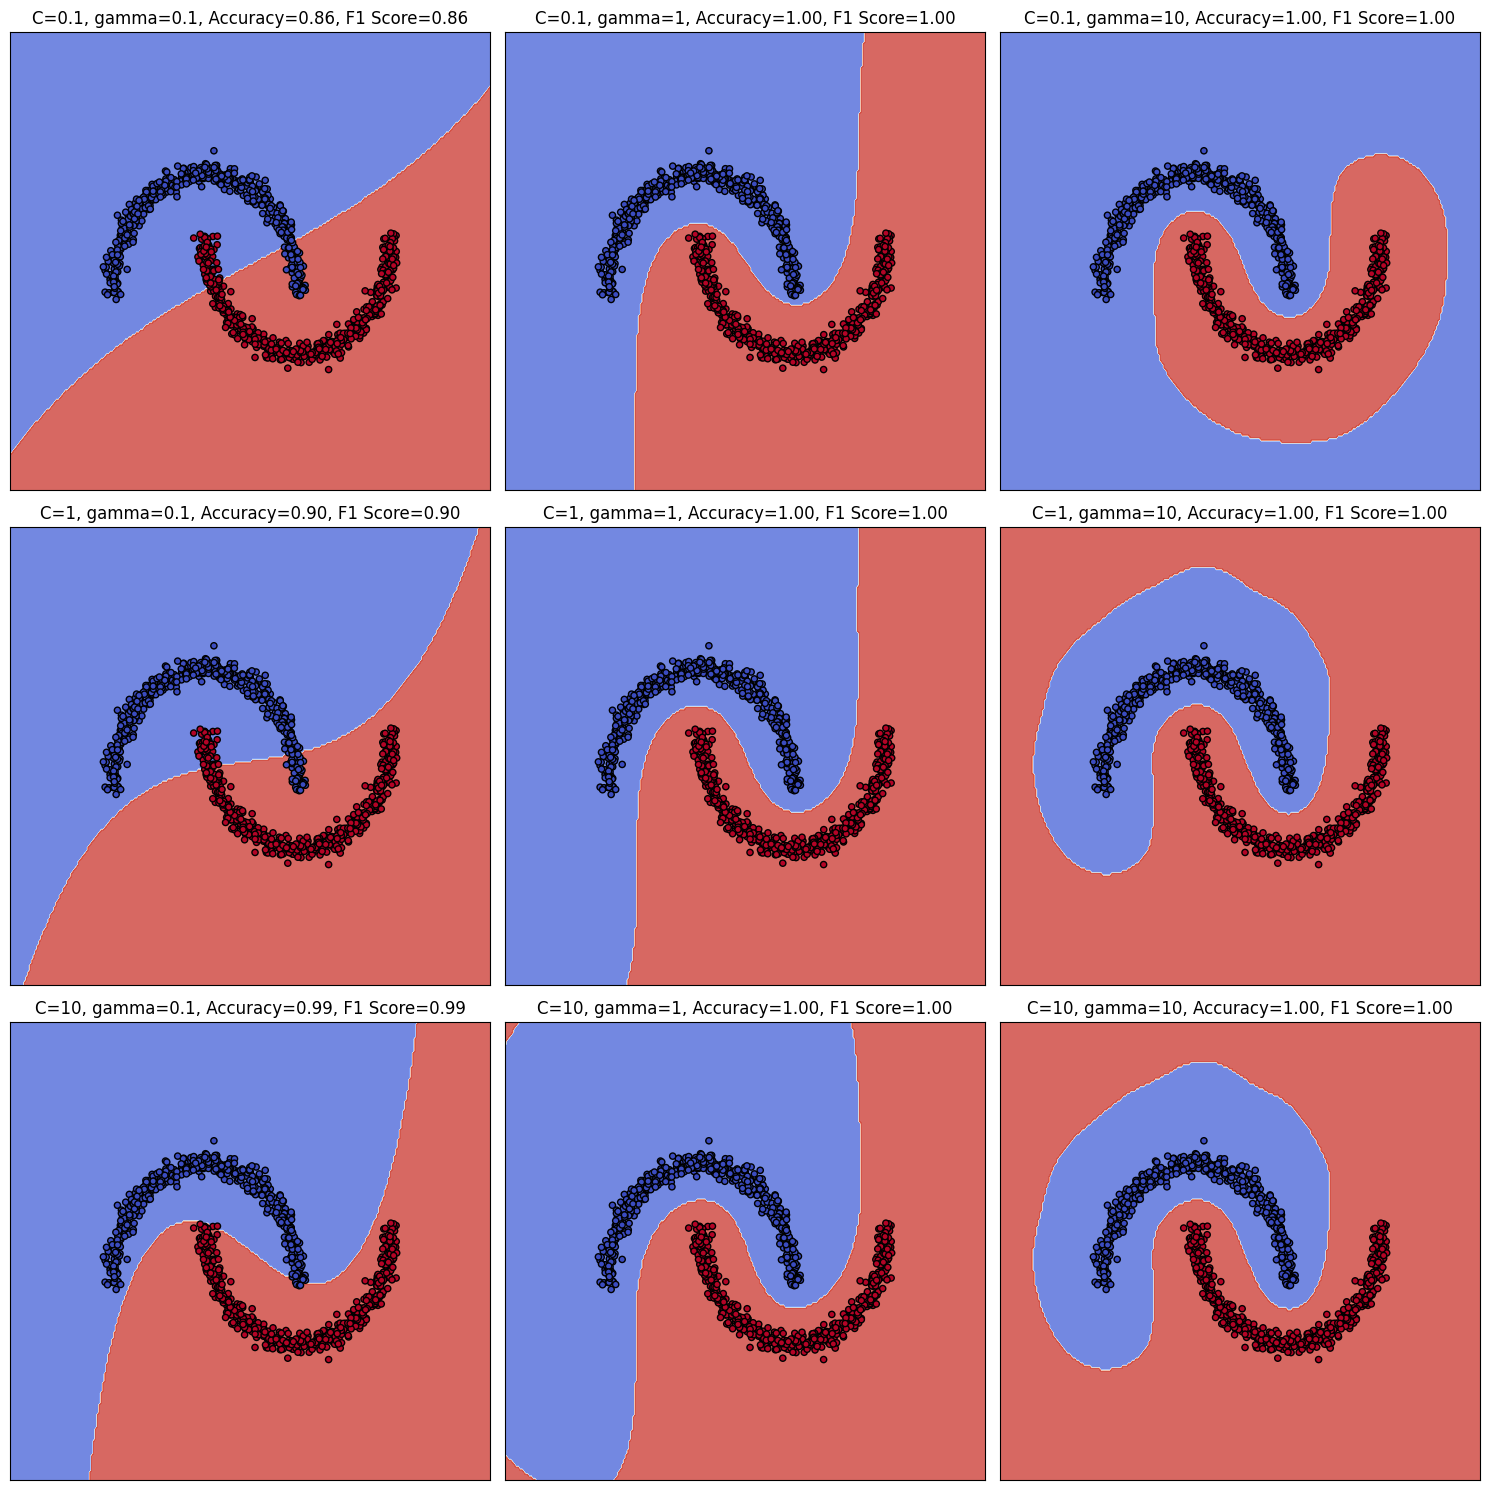

Best Parameters: (0.1, 1) with Accuracy: 1.0


In [14]:
import itertools

param_grid = list(itertools.product([0.1, 1, 10], [0.1, 1, 10]))
best_score = 0
best_params = None

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for (C, gamma), ax in zip(param_grid, axes.ravel()):
    svc = SVC(kernel='rbf', C=C, gamma=gamma)
    svc.fit(X, Y)
    y_pred = svc.predict(X)
    accuracy = accuracy_score(Y, y_pred)
    f1 = f1_score(Y, y_pred, average='weighted')
    title = f'C={C}, gamma={gamma}, Accuracy={accuracy:.2f}, F1 Score={f1:.2f}'
    
    # Plot decision boundary for this combination
    plot_contours(ax, svc, *make_meshgrid(X[:, 0], X[:, 1]), cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
    
    # Optionally, update best score and parameters
    if accuracy > best_score:
        best_score = accuracy
        best_params = (C, gamma)

plt.tight_layout()
plt.show()

print("Best Parameters:", best_params, "with Accuracy:", best_score)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


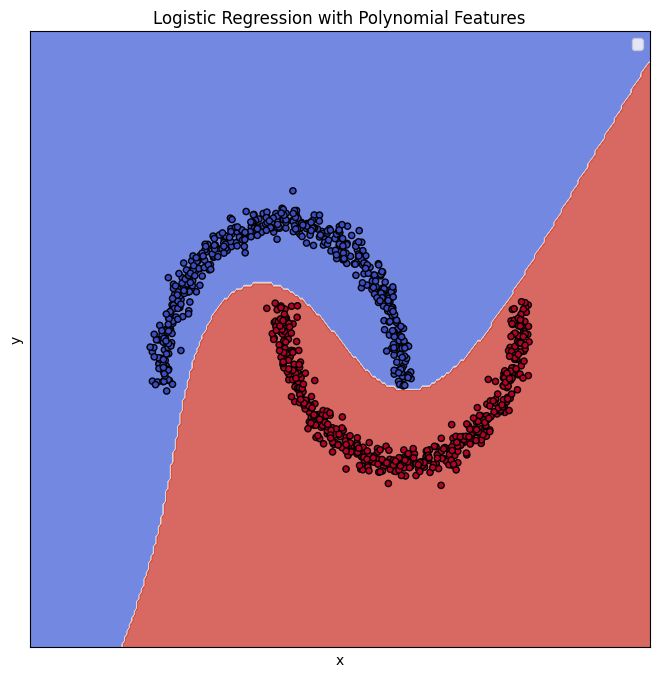

Logistic Regression with Polynomial Features - 
 Accuracy: 1.0 	 Precision: 1.0 	 Recall: 1.0 	 F1 Score: 1.0
Confusion Matrix:
 [[500   0]
 [  0 500]]


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

poly = PolynomialFeatures(degree=3) 
X_poly_train = poly.fit_transform(X)
X_poly_test = poly.transform(X)

log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_poly_train, Y)

# Corrected call: pass the title as the second argument, and poly as a keyword
plot_decision_boundary(log_reg_poly, 'Logistic Regression with Polynomial Features', poly=poly)

# Predictions
y_pred_poly = log_reg_poly.predict(X_poly_test)

# Metrics
accuracy_poly = accuracy_score(Y, y_pred_poly)
precision_poly = precision_score(Y, y_pred_poly, average='weighted')
recall_poly = recall_score(Y, y_pred_poly, average='weighted')
f1_score_poly = f1_score(Y, y_pred_poly, average='weighted')
cm_poly = confusion_matrix(Y, y_pred_poly)

# Print metrics
print("Logistic Regression with Polynomial Features - \n Accuracy:", accuracy_poly, "\t Precision:", precision_poly, "\t Recall:", recall_poly, "\t F1 Score:", f1_score_poly)
print("Confusion Matrix:\n", cm_poly)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


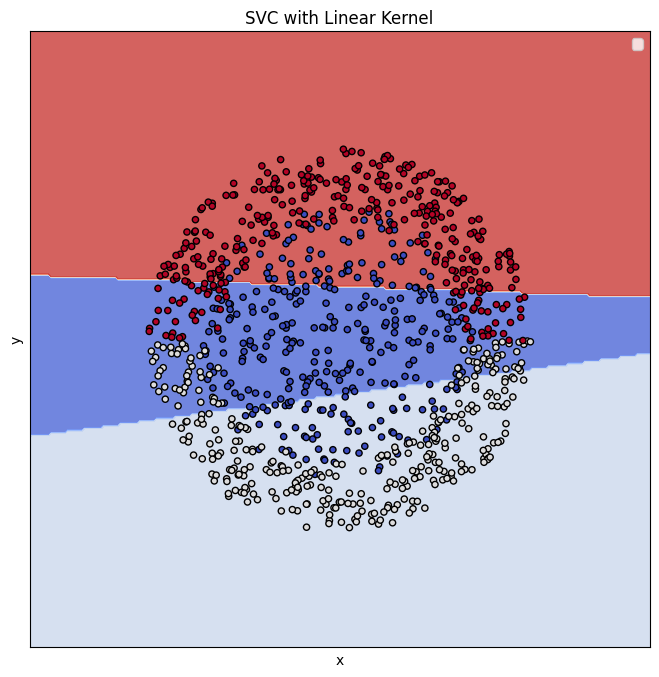

In [16]:
X, Y = circles_dataset(1000)
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_linear.fit(X,Y)
plot_decision_boundary(svc_linear, 'SVC with Linear Kernel')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


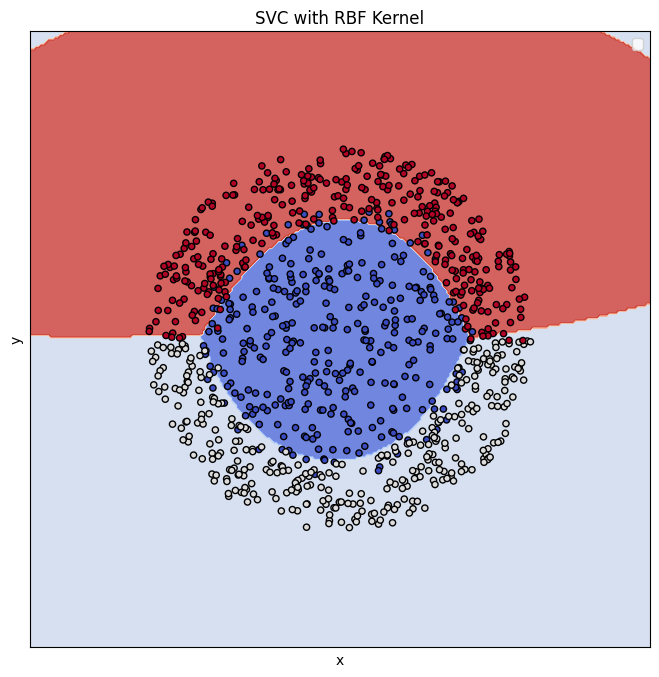

In [17]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X,Y)
plot_decision_boundary(svc_rbf, 'SVC with RBF Kernel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


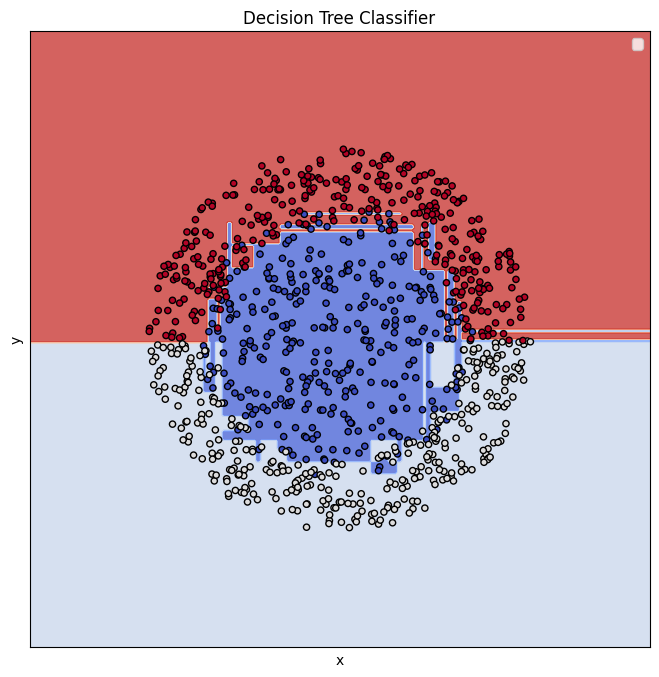

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X,Y)
plot_decision_boundary(dt_classifier, 'Decision Tree Classifier')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


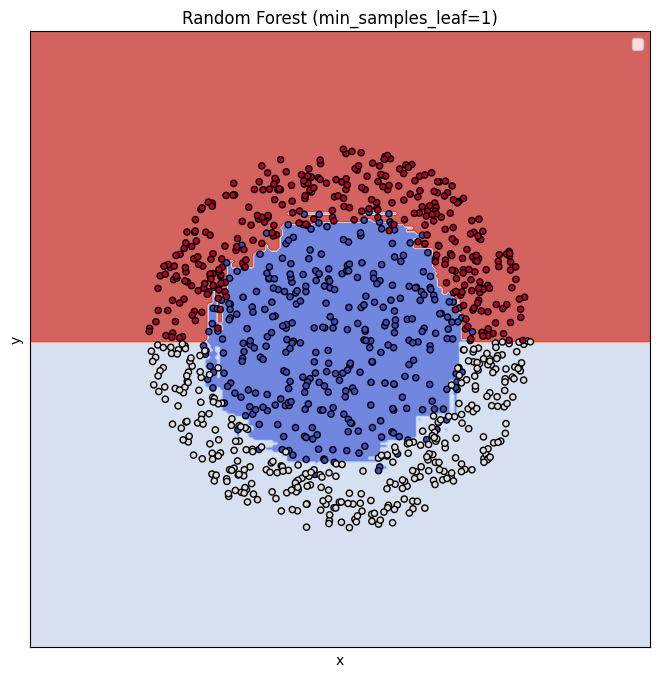

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier_leaf1 = RandomForestClassifier(min_samples_leaf=1)
rf_classifier_leaf1.fit(X,Y)
plot_decision_boundary(rf_classifier_leaf1, 'Random Forest (min_samples_leaf=1)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


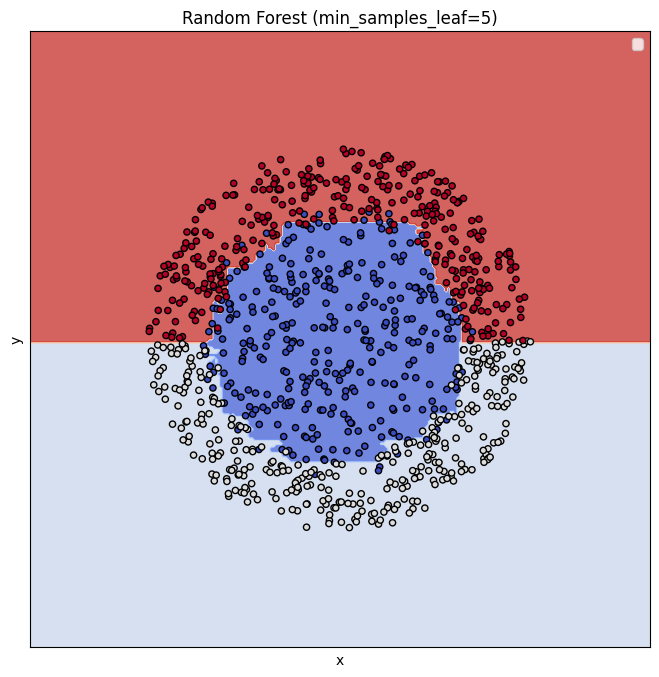

In [20]:
rf_classifier_leaf5 = RandomForestClassifier(min_samples_leaf=5)
rf_classifier_leaf5.fit(X,Y)
plot_decision_boundary(rf_classifier_leaf5, 'Random Forest (min_samples_leaf=5)')

C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


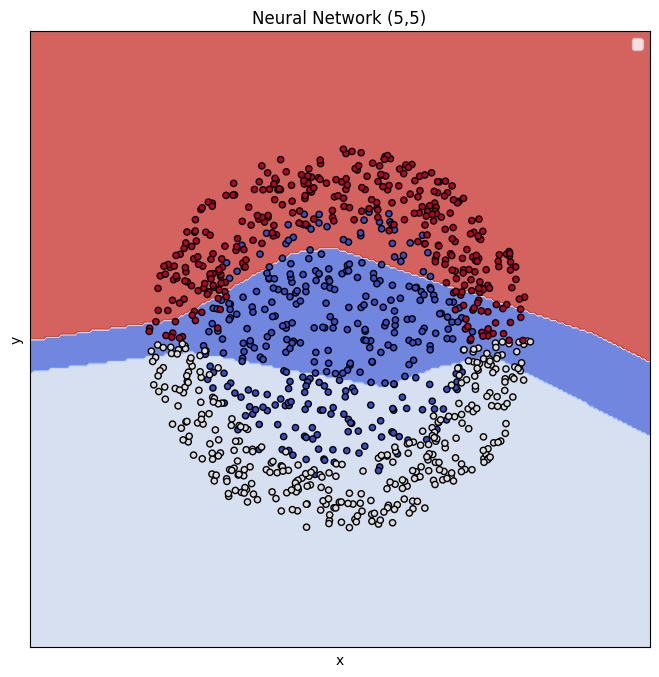

In [21]:
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(5,5))
nn_classifier.fit(X,Y)
plot_decision_boundary(nn_classifier, 'Neural Network (5,5)')

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# For SVC with Linear Kernel
y_pred_linear = svc_linear.predict(X)
accuracy_linear = accuracy_score(Y, y_pred_linear)
precisions = precision_score(Y, y_pred_linear, average=None)
precision_linear_micro = precision_score(Y, y_pred_linear, average="micro")
precision_linear_macro = precision_score(Y, y_pred_linear, average="macro")
precision_linear_w = precision_score(Y, y_pred_linear, average="weighted")
recalls= recall_score(Y, y_pred_linear, average=None)
recall_linear_micro = recall_score(Y, y_pred_linear, average="micro")
recall_linear_macro = recall_score(Y, y_pred_linear, average="macro")
recall_linear_w = recall_score(Y, y_pred_linear, average="weighted")
f1s= f1_score(Y, y_pred_linear, average=None)
f1_linear_micro = f1_score(Y, y_pred_linear, average="micro")
f1_linear_macro = f1_score(Y, y_pred_linear, average="macro")
f1_linear_w = f1_score(Y, y_pred_linear, average="weighted")

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Precision': [precisions[0], precisions[1], precisions[2], precision_linear_micro, precision_linear_macro, precision_linear_w],
    'Recall': [recalls[0], recalls[1], recalls[2], recall_linear_micro, recall_linear_macro, recall_linear_w],
    'F1 Score': [f1s[0], f1s[1], f1s[2], f1_linear_micro, f1_linear_macro, f1_linear_w]
}, index=['0', '1', '2', 'micro', 'macro', 'weighted'])

print("Classification Report for SVC with Linear Kernel:")
print("Accuracy:", accuracy_linear)
print(metrics_df)

# For SVC with RBF Kernel
y_pred_rbf = svc_rbf.predict(X)
accuracy_rbf = accuracy_score(Y, y_pred_rbf)
precisions_rbf = precision_score(Y, y_pred_rbf, average=None)
precision_rbf_micro = precision_score(Y, y_pred_rbf, average="micro")
precision_rbf_macro = precision_score(Y, y_pred_rbf, average="macro")
precision_rbf_w = precision_score(Y, y_pred_rbf, average="weighted")
recalls_rbf = recall_score(Y, y_pred_rbf, average=None)
recall_rbf_micro = recall_score(Y, y_pred_rbf, average="micro")
recall_rbf_macro = recall_score(Y, y_pred_rbf, average="macro")
recall_rbf_w = recall_score(Y, y_pred_rbf, average="weighted")
f1s_rbf = f1_score(Y, y_pred_rbf, average=None)
f1_rbf_micro = f1_score(Y, y_pred_rbf, average="micro")
f1_rbf_macro = f1_score(Y, y_pred_rbf, average="macro")
f1_rbf_w = f1_score(Y, y_pred_rbf, average="weighted")

# Create a DataFrame to store the metrics
metrics_rbf_df = pd.DataFrame({
    'Precision': [precisions_rbf[0], precisions_rbf[1], precisions_rbf[2], precision_rbf_micro, precision_rbf_macro, precision_rbf_w],
    'Recall': [recalls_rbf[0], recalls_rbf[1], recalls_rbf[2], recall_rbf_micro, recall_rbf_macro, recall_rbf_w],
    'F1 Score': [f1s_rbf[0], f1s_rbf[1], f1s_rbf[2], f1_rbf_micro, f1_rbf_macro, f1_rbf_w]
}, index=['0', '1', '2', 'micro', 'macro', 'weighted'])

print("Classification Report for SVC with RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print(metrics_rbf_df)

# For Decision Tree Classifier
y_pred_dt = dt_classifier.predict(X)
accuracy_dt = accuracy_score(Y, y_pred_dt)
precisions_dt = precision_score(Y, y_pred_dt, average=None)
precision_dt_micro = precision_score(Y, y_pred_dt, average="micro")
precision_dt_macro = precision_score(Y, y_pred_dt, average="macro")
precision_dt_w = precision_score(Y, y_pred_dt, average="weighted")
recalls_dt = recall_score(Y, y_pred_dt, average=None)
recall_dt_micro = recall_score(Y, y_pred_dt, average="micro")
recall_dt_macro = recall_score(Y, y_pred_dt, average="macro")
recall_dt_w = recall_score(Y, y_pred_dt, average="weighted")
f1s_dt = f1_score(Y, y_pred_dt, average=None)
f1_dt_micro = f1_score(Y, y_pred_dt, average="micro")
f1_dt_macro = f1_score(Y, y_pred_dt, average="macro")
f1_dt_w = f1_score(Y, y_pred_dt, average="weighted")

# Create a DataFrame to store the metrics
metrics_dt_df = pd.DataFrame({
    'Precision': [precisions_dt[0], precisions_dt[1], precisions_dt[2], precision_dt_micro, precision_dt_macro, precision_dt_w],
    'Recall': [recalls_dt[0], recalls_dt[1], recalls_dt[2], recall_dt_micro, recall_dt_macro, recall_dt_w],
    'F1 Score': [f1s_dt[0], f1s_dt[1], f1s_dt[2], f1_dt_micro, f1_dt_macro, f1_dt_w]
}, index=['0', '1', '2', 'micro', 'macro', 'weighted'])

print("Classification Report for Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print(metrics_dt_df)

# For Random Forest Classifier with min_samples_leaf=1
y_pred_rf_leaf1 = rf_classifier_leaf1.predict(X)
accuracy_rf_leaf1 = accuracy_score(Y, y_pred_rf_leaf1)
precisions_rf_leaf1 = precision_score(Y, y_pred_rf_leaf1, average=None)
precision_rf_leaf1_micro = precision_score(Y, y_pred_rf_leaf1, average="micro")
precision_rf_leaf1_macro = precision_score(Y, y_pred_rf_leaf1, average="macro")
precision_rf_leaf1_w = precision_score(Y, y_pred_rf_leaf1, average="weighted")
recalls_rf_leaf1 = recall_score(Y, y_pred_rf_leaf1, average=None)
recall_rf_leaf1_micro = recall_score(Y, y_pred_rf_leaf1, average="micro")
recall_rf_leaf1_macro = recall_score(Y, y_pred_rf_leaf1, average="macro")
recall_rf_leaf1_w = recall_score(Y, y_pred_rf_leaf1, average="weighted")
f1s_rf_leaf1 = f1_score(Y, y_pred_rf_leaf1, average=None)
f1_rf_leaf1_micro = f1_score(Y, y_pred_rf_leaf1, average="micro")
f1_rf_leaf1_macro = f1_score(Y, y_pred_rf_leaf1, average="macro")
f1_rf_leaf1_w = f1_score(Y, y_pred_rf_leaf1, average="weighted")

# Create a DataFrame to store the metrics
metrics_rf_leaf1_df = pd.DataFrame({
    'Precision': [precisions_rf_leaf1[0], precisions_rf_leaf1[1], precisions_rf_leaf1[2], precision_rf_leaf1_micro, precision_rf_leaf1_macro, precision_rf_leaf1_w],
    'Recall': [recalls_rf_leaf1[0], recalls_rf_leaf1[1], recalls_rf_leaf1[2], recall_rf_leaf1_micro, recall_rf_leaf1_macro, recall_rf_leaf1_w],
    'F1 Score': [f1s_rf_leaf1[0], f1s_rf_leaf1[1], f1s_rf_leaf1[2], f1_rf_leaf1_micro, f1_rf_leaf1_macro, f1_rf_leaf1_w]
}, index=['0', '1', '2', 'micro', 'macro', 'weighted'])

print("Classification Report for Random Forest Classifier (min_samples_leaf=1):")
print("Accuracy:", accuracy_rf_leaf1)
print(metrics_rf_leaf1_df)

# For Random Forest Classifier with min_samples_leaf=5
y_pred_rf_leaf5 = rf_classifier_leaf5.predict(X)
accuracy_rf_leaf5 = accuracy_score(Y, y_pred_rf_leaf5)
precisions_rf_leaf5 = precision_score(Y, y_pred_rf_leaf5, average=None)
precision_rf_leaf5_micro = precision_score(Y, y_pred_rf_leaf5, average="micro")
precision_rf_leaf5_macro = precision_score(Y, y_pred_rf_leaf5, average="macro")
precision_rf_leaf5_w = precision_score(Y, y_pred_rf_leaf5, average="weighted")
recalls_rf_leaf5 = recall_score(Y, y_pred_rf_leaf5, average=None)
recall_rf_leaf5_micro = recall_score(Y, y_pred_rf_leaf5, average="micro")
recall_rf_leaf5_macro = recall_score(Y, y_pred_rf_leaf5, average="macro")
recall_rf_leaf5_w = recall_score(Y, y_pred_rf_leaf5, average="weighted")
f1s_rf_leaf5 = f1_score(Y, y_pred_rf_leaf5, average=None)
f1_rf_leaf5_micro = f1_score(Y, y_pred_rf_leaf5, average="micro")
f1_rf_leaf5_macro = f1_score(Y, y_pred_rf_leaf5, average="macro")
f1_rf_leaf5_w = f1_score(Y, y_pred_rf_leaf5, average="weighted")

# Create a DataFrame to store the metrics
metrics_rf_leaf5_df = pd.DataFrame({
    'Precision': [precisions_rf_leaf5[0], precisions_rf_leaf5[1], precisions_rf_leaf5[2], precision_rf_leaf5_micro, precision_rf_leaf5_macro, precision_rf_leaf5_w],
    'Recall': [recalls_rf_leaf5[0], recalls_rf_leaf5[1], recalls_rf_leaf5[2], recall_rf_leaf5_micro, recall_rf_leaf5_macro, recall_rf_leaf5_w],
    'F1 Score': [f1s_rf_leaf5[0], f1s_rf_leaf5[1], f1s_rf_leaf5[2], f1_rf_leaf5_micro, f1_rf_leaf5_macro, f1_rf_leaf5_w]
}, index=['0', '1', '2', 'micro', 'macro', 'weighted'])

print("Classification Report for Random Forest Classifier (min_samples_leaf=5):")
print("Accuracy:", accuracy_rf_leaf5)
print(metrics_rf_leaf5_df)

# For Neural Network Classifier with hidden_layer_sizes=(5,5)
y_pred_nn_double = nn_double.predict(X)
accuracy_nn_double = accuracy_score(Y, y_pred_nn_double)
precisions_nn_double = precision_score(Y, y_pred_nn_double, average=None)
precision_nn_double_micro = precision_score(Y, y_pred_nn_double, average="micro")
precision_nn_double_macro = precision_score(Y, y_pred_nn_double, average="macro")
precision_nn_double_w = precision_score(Y, y_pred_nn_double, average="weighted")
recalls_nn_double = recall_score(Y, y_pred_nn_double, average=None)
recall_nn_double_micro = recall_score(Y, y_pred_nn_double, average="micro")
recall_nn_double_macro = recall_score(Y, y_pred_nn_double, average="macro")
recall_nn_double_w = recall_score(Y, y_pred_nn_double, average="weighted")
f1s_nn_double = f1_score(Y, y_pred_nn_double, average=None)
f1_nn_double_micro = f1_score(Y, y_pred_nn_double, average="micro")
f1_nn_double_macro = f1_score(Y, y_pred_nn_double, average="macro")
f1_nn_double_w = f1_score(Y, y_pred_nn_double, average="weighted")

# Create a DataFrame to store the metrics
metrics_nn_double_df = pd.DataFrame({
    'Precision': [precisions_nn_double[0], precisions_nn_double[1], precisions_nn_double[2], precision_nn_double_micro, precision_nn_double_macro, precision_nn_double_w],
    'Recall': [recalls_nn_double[0], recalls_nn_double[1], recalls_nn_double[2], recall_nn_double_micro, recall_nn_double_macro, recall_nn_double_w],
    'F1 Score': [f1s_nn_double[0], f1s_nn_double[1], f1s_nn_double[2], f1_nn_double_micro, f1_nn_double_macro, f1_nn_double_w]
}, index=['0', '1', '2', 'micro', 'macro', 'weighted'])

print("Classification Report for Neural Network Classifier (5,5):")
print("Accuracy:", accuracy_nn_double)
print(metrics_nn_double_df)


Classification Report for SVC with Linear Kernel:
Accuracy: 0.6906906906906907
          Precision    Recall  F1 Score
0          0.536145  0.534535  0.535338
1          0.766154  0.747748  0.756839
2          0.769006  0.789790  0.779259
micro      0.690691  0.690691  0.690691
macro      0.690435  0.690691  0.690479
weighted   0.690435  0.690691  0.690479
Classification Report for SVC with RBF Kernel:
Accuracy: 0.9169169169169169
          Precision    Recall  F1 Score
0          0.974359  0.798799  0.877888
1          0.882979  0.996997  0.936530
2          0.908571  0.954955  0.931186
micro      0.916917  0.916917  0.916917
macro      0.921970  0.916917  0.915201
weighted   0.921970  0.916917  0.915201
Classification Report for Decision Tree Classifier:
Accuracy: 1.0
          Precision  Recall  F1 Score
0               1.0     1.0       1.0
1               1.0     1.0       1.0
2               1.0     1.0       1.0
micro           1.0     1.0       1.0
macro           1.0     1.0  

C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: 

Naive sampling ring fractions: [0.165  0.136  0.111  0.095  0.0905 0.078  0.087  0.0785 0.076  0.083 ]
Area sampling ring fractions:  [0.106  0.105  0.09   0.1125 0.1055 0.09   0.1065 0.097  0.0995 0.088 ]
Ideal fraction per ring:       0.1


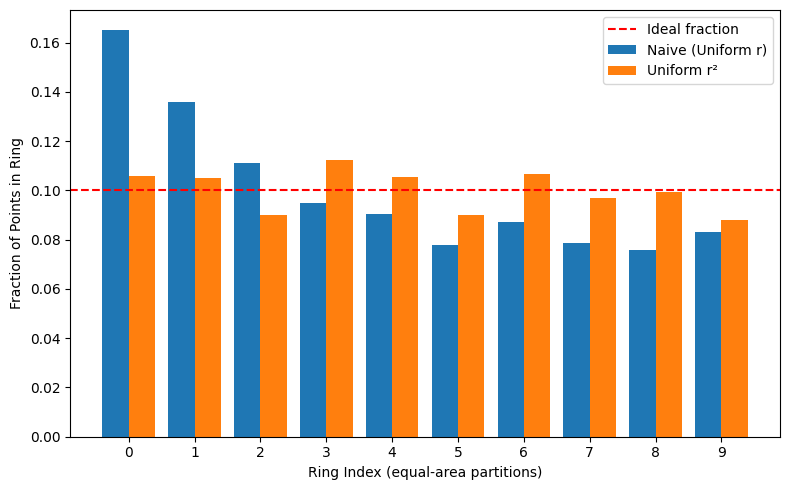

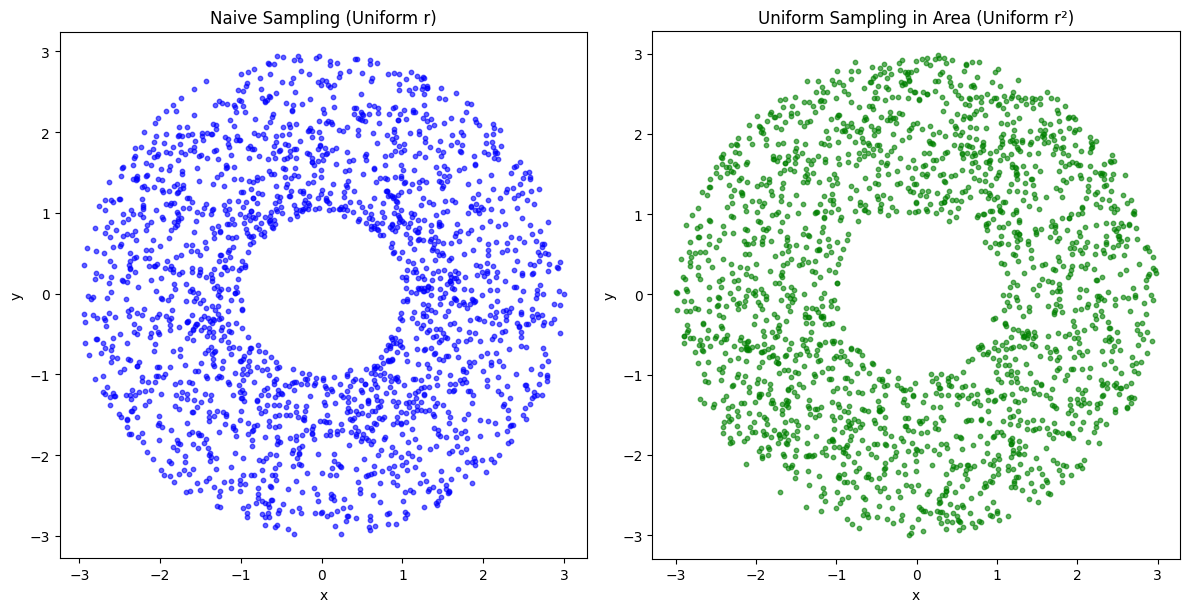

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def sample_annulus_naive(n_points, r1, r2):
    """
    Sample points in an annulus by picking r uniformly in [r1, r2]
    and theta uniformly in [0, 2*pi].
    """
    r = np.random.uniform(r1, r2, n_points)
    theta = np.random.uniform(0, 2*np.pi, n_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

def sample_annulus_area(n_points, r1, r2):
    """
    Sample points uniformly in the area of an annulus by picking
    r^2 uniformly in [r1^2, r2^2] and then taking sqrt(r^2).
    """
    u = np.random.uniform(r1**2, r2**2, n_points)
    r = np.sqrt(u)
    theta = np.random.uniform(0, 2*np.pi, n_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

def measure_ring_distribution(points, r1, r2, n_rings=10):
    """
    Divide the annulus [r1, r2] into n_rings concentric rings of equal AREA,
    count how many points fall into each ring, and return the fraction of
    points in each ring.
    """
    # Radii of points
    radii = np.sqrt(points[:, 0]**2 + points[:, 1]**2)

    # We want each ring to have the same AREA, so we partition [r1^2, r2^2]
    # into n_rings equal segments and then take square roots for the edges.
    ring_edges_sq = np.linspace(r1**2, r2**2, n_rings+1)  # edges in r^2
    ring_edges = np.sqrt(ring_edges_sq)                  # edges in r

    ring_counts = np.zeros(n_rings, dtype=int)
    for i in range(n_rings):
        in_ring = (radii >= ring_edges[i]) & (radii < ring_edges[i+1])
        ring_counts[i] = np.sum(in_ring)

    # Convert to fractions
    ring_fractions = ring_counts / len(points)
    return ring_fractions

# Demo usage
if __name__ == "__main__":
    # Annulus parameters
    r1, r2 = 1.0, 3.0
    n_points = 2000
    n_rings = 10

    # Sample points
    naive_points = sample_annulus_naive(n_points, r1, r2)
    area_points = sample_annulus_area(n_points, r1, r2)

    # Measure distribution in each ring
    naive_fractions = measure_ring_distribution(naive_points, r1, r2, n_rings)
    area_fractions = measure_ring_distribution(area_points, r1, r2, n_rings)

    # Ideal fraction (each ring should have 1/n_rings of the points)
    ideal_fraction = 1.0 / n_rings

    print("Naive sampling ring fractions:", naive_fractions)
    print("Area sampling ring fractions: ", area_fractions)
    print("Ideal fraction per ring:      ", ideal_fraction)

    # Plot a bar chart comparing the two methods
    ring_ids = np.arange(n_rings)
    width = 0.4
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(ring_ids - width/2, naive_fractions, width, label='Naive (Uniform r)')
    ax.bar(ring_ids + width/2, area_fractions, width, label='Uniform r²')
    ax.axhline(ideal_fraction, color='red', linestyle='--', label='Ideal fraction')
    ax.set_xticks(ring_ids)
    ax.set_xlabel('Ring Index (equal-area partitions)')
    ax.set_ylabel('Fraction of Points in Ring')
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Scatter plot of the sampled points
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].scatter(naive_points[:, 0], naive_points[:, 1], c='blue', s=10, alpha=0.6)
    axes[0].set_title('Naive Sampling (Uniform r)')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_aspect('equal')

    axes[1].scatter(area_points[:, 0], area_points[:, 1], c='green', s=10, alpha=0.6)
    axes[1].set_title('Uniform Sampling in Area (Uniform r²)')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].set_aspect('equal')

    plt.tight_layout()
    plt.show()
